# 浮点数非结合性演示

本notebook演示了浮点数运算的非结合性特性，这是导致LLM推理非确定性的根本原因之一。

## 主要内容

1. **浮点数非结合性基础概念**
2. **求和顺序依赖性演示**
3. **矩阵乘法确定性验证**
4. **可视化分析**

## 背景知识

浮点数在计算机中的表示遵循IEEE 754标准，由于有限的精度，浮点数运算不满足结合律：
$$(a + b) + c \neq a + (b + c)$$

这种非结合性在并行计算和不同批处理大小下会导致数值结果的差异。


In [2]:
# 导入必要的库
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from floating_point import FloatingPointDemo, create_floating_point_examples

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("库导入完成！")


使用中文字体: Arial Unicode MS
库导入完成！


## 1. 基本非结合性演示

让我们从最基本的例子开始，展示浮点数的非结合性。


In [3]:
# 创建演示实例
demo = FloatingPointDemo()

# 运行基本非结合性演示
demo.demonstrate_non_associativity()


=== 浮点数非结合性演示 ===
a = 0.1, b = 1e+20, c = -1e+20
(a + b) + c = 0.0
a + (b + c) = 0.1
两者相等吗？ False
差异: 0.1



## 2. 更多浮点数非结合性示例

让我们看看更多不同类型的浮点数非结合性示例。


In [4]:
# 创建更多示例
examples = create_floating_point_examples()

print("=== 更多浮点数非结合性示例 ===")
for label, result1, result2 in examples:
    diff = abs(result1 - result2)
    print(f"{label}:")
    print(f"  (a + b) + c = {result1}")
    print(f"  a + (b + c) = {result2}")
    print(f"  差异: {diff:.2e}")
    print()


=== 更多浮点数非结合性示例 ===
不同数量级:
  (a + b) + c = 0.0
  a + (b + c) = 0.1
  差异: 1.00e-01

精度损失:
  (a + b) + c = 0.0100100001
  a + (b + c) = 0.0100100001
  差异: 0.00e+00

大数相加:
  (a + b) + c = 0.0
  a + (b + c) = 0.0
  差异: 0.00e+00



## 3. 求和顺序依赖性演示

这个演示展示了当我们将包含不同数量级的数值以不同顺序相加时会发生什么。


In [5]:
# 运行求和顺序依赖性演示
results = demo.demonstrate_sum_order_dependency(num_experiments=10000)


=== 求和顺序依赖性演示 ===
原始数组: [1e-10, 1e-05, 0.01, 1, -1e-10, -1e-05, -0.01, -1]
理论总和: 8.326672684688674e-17

经过 10000 次随机打乱后，得到 103 种不同的结果
结果范围: [-8.33e-17, 8.33e-17]
前10个唯一结果: [-8.326672684688674e-17, -7.45931094670027e-17, -7.419330991589868e-17, -7.418483958642613e-17, -7.37850400353221e-17, -6.63192916382227e-17, -6.591949208711867e-17, -6.591102175764613e-17, -6.551969253601464e-17, -6.55112222065421e-17]


## 4. 矩阵乘法确定性验证

虽然浮点数运算存在非结合性，但矩阵乘法在相同输入下是确定性的。


In [7]:
# 验证矩阵乘法的确定性
demo.demonstrate_matrix_multiplication_determinism()


=== 矩阵乘法确定性演示 ===
经过 100 次测试，矩阵乘法结果完全确定
最大差异: 0.00e+00


## 5. 可视化分析

让我们可视化求和结果的分布，以更好地理解浮点数非结合性的影响。


图表已保存到: ../experiments/plots/floating_point_demo.png


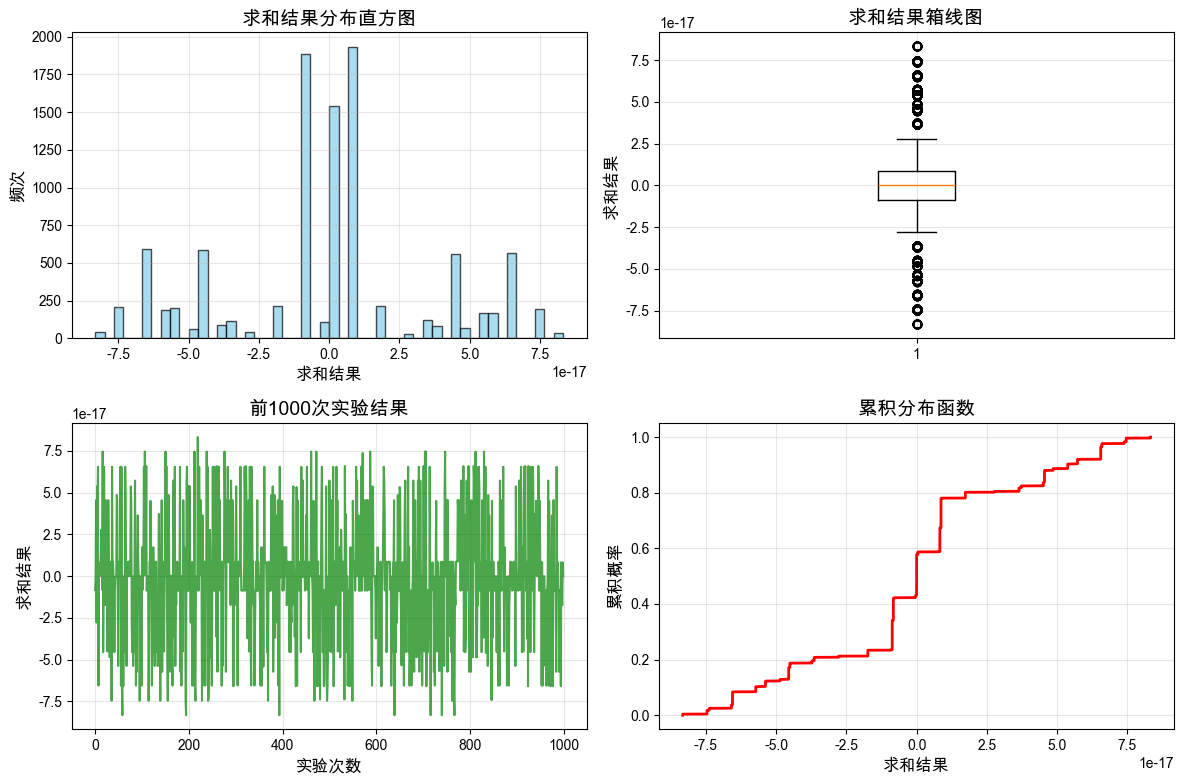

In [8]:
# 可视化求和结果分布
demo.visualize_sum_distribution('../experiments/plots/floating_point_demo.png')


## 6. 完整演示

运行完整的浮点数非结合性演示，包括所有功能。


开始浮点数非结合性完整演示...

=== 浮点数非结合性演示 ===
a = 0.1, b = 1e+20, c = -1e+20
(a + b) + c = 0.0
a + (b + c) = 0.1
两者相等吗？ False
差异: 0.1

=== 求和顺序依赖性演示 ===
原始数组: [1e-10, 1e-05, 0.01, 1, -1e-10, -1e-05, -0.01, -1]
理论总和: 8.326672684688674e-17

经过 10000 次随机打乱后，得到 103 种不同的结果
结果范围: [-8.33e-17, 8.33e-17]
前10个唯一结果: [-8.326672684688674e-17, -7.45931094670027e-17, -7.419330991589868e-17, -7.418483958642613e-17, -7.37850400353221e-17, -6.63192916382227e-17, -6.591949208711867e-17, -6.591102175764613e-17, -6.551969253601464e-17, -6.55112222065421e-17]
=== 矩阵乘法确定性演示 ===
经过 100 次测试，矩阵乘法结果完全确定
最大差异: 0.00e+00


FileNotFoundError: [Errno 2] No such file or directory: 'experiments/plots/floating_point_demo.png'

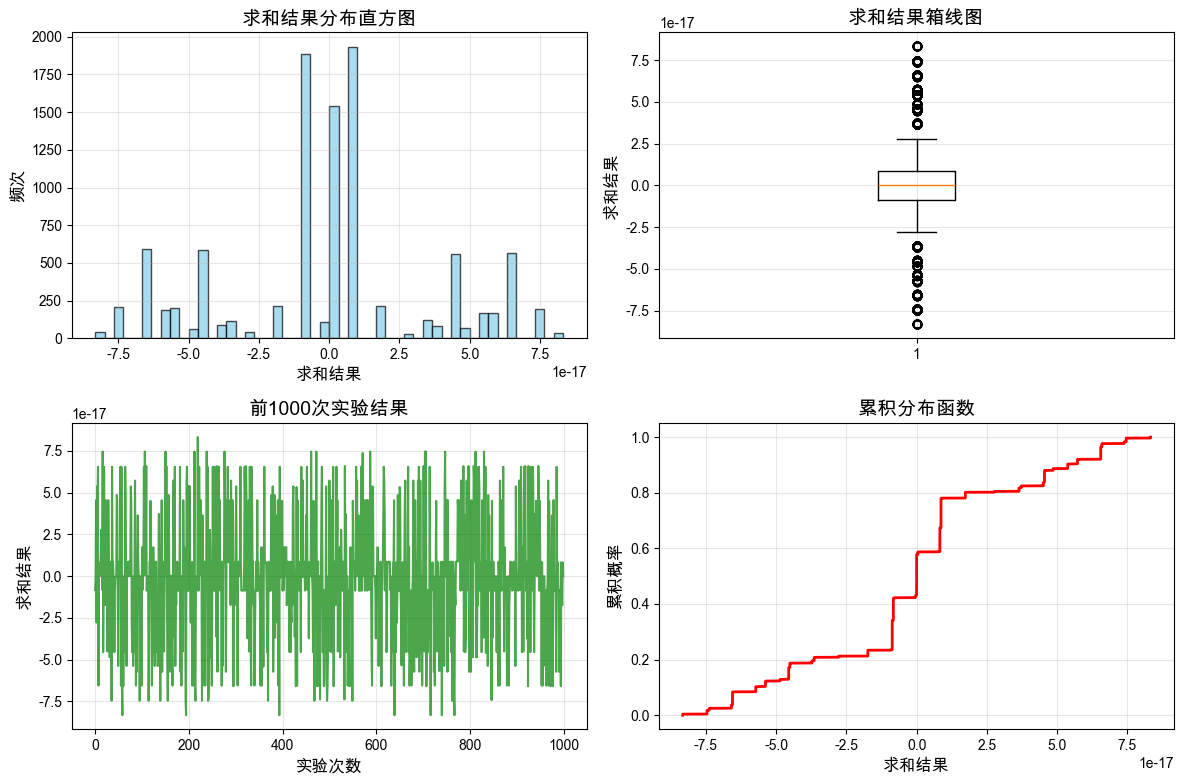

In [10]:
# 运行完整演示
demo.run_complete_demo()
